In [333]:
import warnings
warnings.filterwarnings('ignore') # waring message 안 나타나게 하기.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [384]:
# 파일 불러오기
df_org = pd.read_csv("C:/Users/gherwt/KDT30/p1/seongdong_df_total.csv")

In [385]:
# house_df = house_df_org 데이터가 저장된 주소만을 복사하기 때문에 얕은 복사 = 주소 만을 공유
seongdong = df_org.copy() # 깊은 복사
seongdong.head()

# Target 값 : total_deposit (마지막 칼럼)

,date,build_year,dong,floor,use_area,res_cnt,cctv_cnt,school_dis,sub_dis,total_deposit
0,201501,1986,하왕십리동,3,39.70,36,268,0.104621,0.106753,15000
1,201501,2012,하왕십리동,4,13.97,36,268,0.104621,0.153176,8714
2,201501,1977,홍익동,3,85.36,51,81,0.180476,0.441108,17000
3,201501,2014,홍익동,2,27.45,51,81,0.180476,0.283358,19000
4,201501,2012,도선동,5,17.56,75,66,0.038938,0.382163,11714


In [379]:
# 데이터 확인
seongdeong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12211 entries, 0 to 12210
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           12211 non-null  int64  
 1   build_year     12211 non-null  int64  
 2   dong           12211 non-null  object 
 3   floor          12211 non-null  int64  
 4   use_area       12211 non-null  float64
 5   res_cnt        12211 non-null  int64  
 6   cctv_cnt       12211 non-null  int64  
 7   school_dis     12211 non-null  float64
 8   sub_dis        12211 non-null  float64
 9   total_deposit  12211 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 954.1+ KB


**데이터 타입과 Null 값 갯수 확인**

In [337]:
print('데이터 세트의 Shape:', seongdong.shape) # 전체 몇 행, 몇 열
print('\n전체 feature 들의 type \n',seongdong.dtypes.value_counts()) # type 을 확인

# Null 컬럼 확인
isnull_series = seongdeong.isnull().sum()

데이터 세트의 Shape: (12211, 10)

전체 feature 들의 type 
 int64      6
float64    3
object     1
Name: count, dtype: int64


### 회귀 모델 적용하기 전에 타겟 값의 분포도 확인

- total_deposit 의 분포도 확인

<Axes: title={'center': 'Original total_deposit Histogram'}, xlabel='total_deposit', ylabel='Density'>

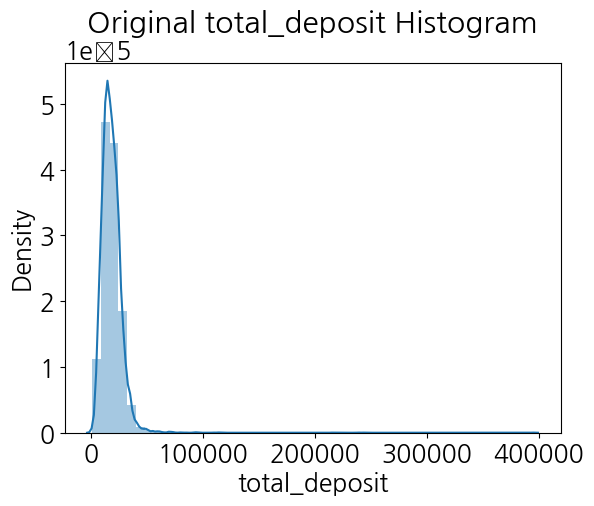

In [338]:
plt.title('Original total_deposit Histogram')
sns.distplot(seongdong['total_deposit'])

In [339]:
#원래값 저장
original_SalePrince = seongdong['total_deposit']

**문자열값은 모두 카테고리값. 판다스의 get_dummies( )를 이용하여 원-핫 인코딩 수행**

In [340]:
print('get_dummies() 수행 전 데이터 Shape:', seongdong.shape)
seongdong_ohe = pd.get_dummies(seongdong) # one-hot encoding 수행

print('get_dummies() 수행 후 데이터 Shape:', seongdong_ohe.shape)

get_dummies() 수행 전 데이터 Shape: (12211, 10)
get_dummies() 수행 후 데이터 Shape: (12211, 26)


In [341]:
seongdeong_ohe
# 날짜를 언제 계약(지금을 기준으로)
# 건축년도(최신? 오래되었나?, 현재를 기준으로 -, 가장 최신이 0, 오래된거로 +)
# 나머지 표점으로 변경해서 진행.
# 원핫은 건드리지말기 -> rmse 개선이 있는지

# regresser 모델 random, 분류 모델들에서도 사용

,date,build_year,floor,use_area,res_cnt,cctv_cnt,school_dis,sub_dis,total_deposit,dong_금호동1가,...,dong_상왕십리동,dong_성수동1가,dong_성수동2가,dong_송정동,dong_옥수동,dong_용답동,dong_응봉동,dong_하왕십리동,dong_행당동,dong_홍익동
0,201501,1986,3,39.70,36,268,0.104621,0.106753,15000,False,...,False,False,False,False,False,False,False,True,False,False
1,201501,2012,4,13.97,36,268,0.104621,0.153176,8714,False,...,False,False,False,False,False,False,False,True,False,False
2,201501,1977,3,85.36,51,81,0.180476,0.441108,17000,False,...,False,False,False,False,False,False,False,False,False,True
3,201501,2014,2,27.45,51,81,0.180476,0.283358,19000,False,...,False,False,False,False,False,False,False,False,False,True
4,201501,2012,5,17.56,75,66,0.038938,0.382163,11714,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12206,202212,2022,5,29.89,173,259,0.349178,0.590882,19000,False,...,False,False,False,False,False,True,False,False,False,False
12207,202212,2022,5,26.96,173,259,0.349178,0.110491,25000,False,...,False,False,False,False,False,True,False,False,False,False
12208,202212,2022,2,26.74,173,259,0.349178,0.110491,24000,False,...,False,False,False,False,False,True,False,False,False,False
12209,202212,2022,2,27.12,173,259,0.349178,0.110491,24000,False,...,False,False,False,False,False,True,False,False,False,False


### 선형 회귀 모델의 학습/예측/평가

LinearRegression, Ridge, Lasso를 이용해 선형 계열의 회귀 모델 만들기

**RMSE 평가 함수 생성**

In [342]:
## 데이터 분할
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 타깃과 피처
y_target = seongdong_ohe['total_deposit']
X_features = seongdong_ohe.drop('total_deposit', axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [343]:
# 단일 모델의 RMSE 값 반환
# RMSE : 평균 제곱근 오차를 의미하는 평가 지표 -> 이 값이 작을수록 모델의 예측 성능이 우수하다.
def get_rmse(model): # 학습된 모델을 받아서 예측
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse) # 루트를 씌워서 데이터 간의 격차를 줄여준다.
    print('{0} RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

# 여러 모델의 RMSE 값 반환/ 각각의 모델들에 대해서 rmse 를 리턴하는 함수를 만들겠다.
def get_rmses(models):
    rmses = [] # 반환된 각 모델의 rmse값을 저장한다.
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)    
    return rmses # 전달된 모델들의 rmse 값들이 저장된 list 가 반환이 된다.

**모델 학습/예측/평가ㅣ**

In [344]:
# 일반 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

# 릿찌회귀
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
# 라쏘 회귀
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [345]:
#학습된 모델 전달하고
models = [lr_reg, ridge_reg, lasso_reg]
# rmse값 반환
get_rmses(models)
# 릿지가 값이 가장 작고, 선형회귀가 값이 가장 크다. 하지만 그 차이가 크지 않아 모델들의 성능은 비슷하다고 볼 수 있다.

LinearRegression RMSE: 5889.575
Ridge RMSE: 5887.556
Lasso RMSE: 5888.688


[5889.574590349962, 5887.556341962586, 5888.687900532619]

### 로그 변환 전
- LinearRegression RMSE: 5889.575
- Ridge RMSE: 5887.556
- Lasso RMSE: 5888.688

[5889.574590349962, 5887.556341962586, 5888.687900532619]

In [346]:
# 시각화작업
# 각 모델에서 결정한 회귀계수 값 중 상위/하위 10개의 회귀계수 값과 해당 index를 반환하는 함수.
def get_top_bottom_coef(model) :
    
    # series 생성한다. 각 독립변수의 회귀계수가 저장됨
    coef = pd.Series(model.coef_, index=X_features.columns)

    # 내림차순 상위 10개
    coef_high = coef.sort_values(ascending=False).head(10)
    
    # 내림차순 하위 10개
    coef_low = coef.sort_values(ascending=False).tail(10)
    
    return coef_high, coef_low

In [347]:
# 모델별 회귀 계수 시각화 함수
# list 객체로 모델을 입력 받아서
# 모델별로 회귀 계수 상위 10개, 하위 10개 추출해서
# 가로 막대 그래프 형태로 출력
def visualize_coefficient(models):

    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성, 한번에 3개의 그래프를 그릴 수 있도록 한다.
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 

    palette = sns.color_palette("husl", n_colors=len(models))
    
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, (model, color) in enumerate(zip(models, palette)):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__ +' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120) # 안쪽, 패딩값, 안쪽을 좁게
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22) # 글씨 크기 설정
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

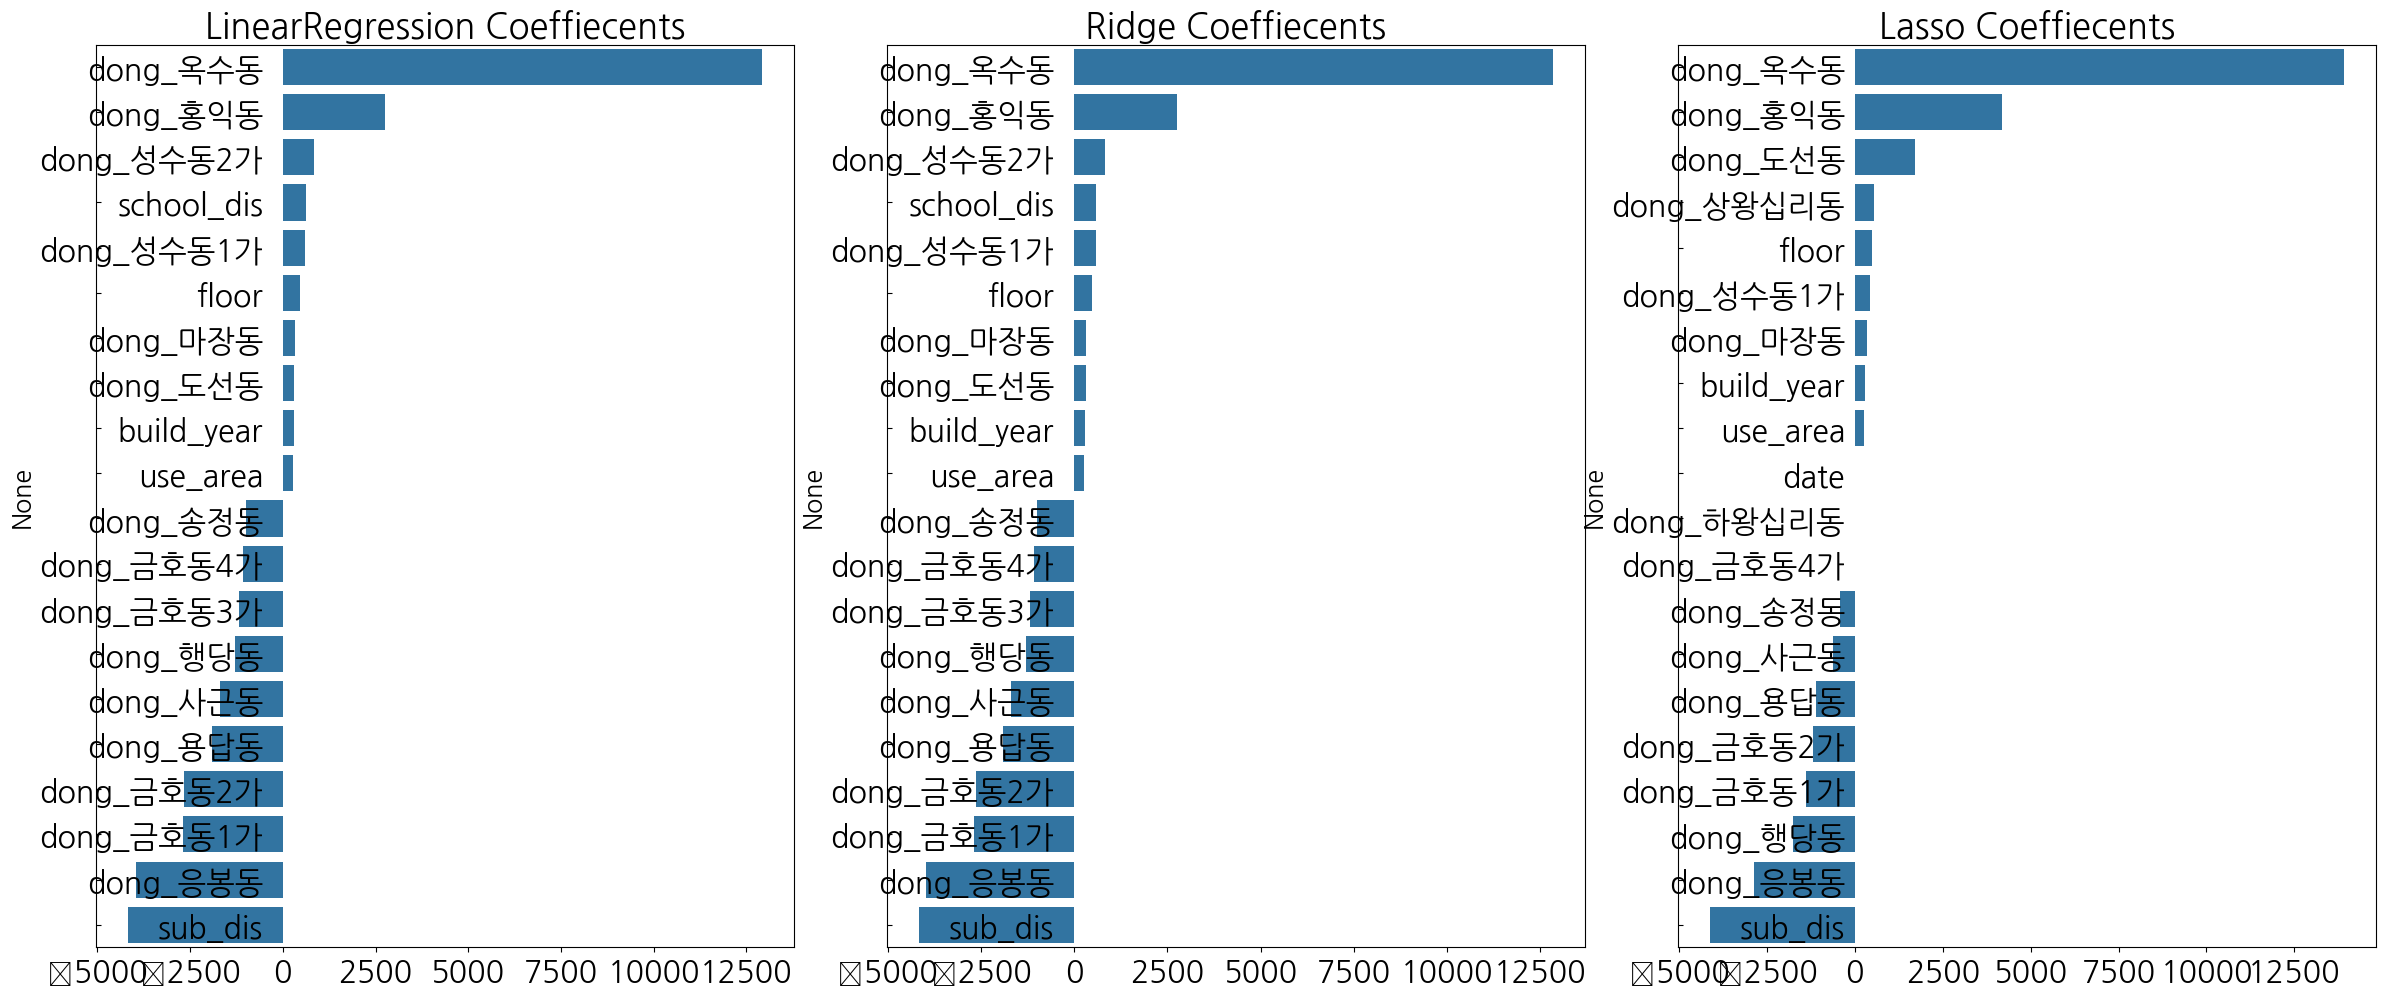

In [348]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [349]:
X_train.shape

(9768, 25)

In [350]:
# 로그 변환하여 진행한다.

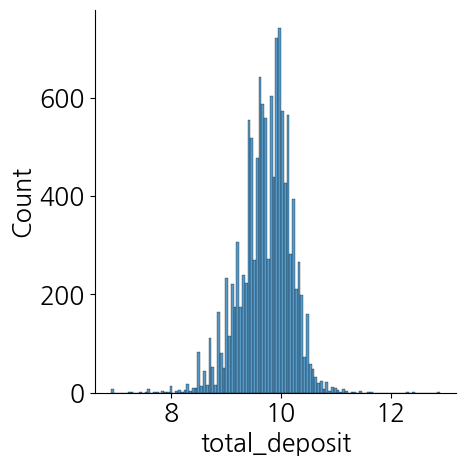

In [351]:
log_deposit = np.log1p(seongdong['total_deposit'])
sns.displot(log_deposit)

In [352]:
seongdong['total_deposit'] = np.log1p(seongdong['total_deposit'])

In [353]:
print('get_dummies() 수행 전 데이터 Shape:', seongdong.shape)
seongdong_ohe = pd.get_dummies(seongdong) # one-hot encoding 수행
print('get_dummies() 수행 후 데이터 Shape:', seongdong_ohe.shape)

get_dummies() 수행 전 데이터 Shape: (12211, 10)
get_dummies() 수행 후 데이터 Shape: (12211, 26)


In [354]:
y_target = seongdong_ohe['total_deposit']
X_features = seongdong_ohe.drop('total_deposit',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [355]:
# 일반 선형 회귀
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

# 릿찌회귀
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
# 라쏘 회귀
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

Lasso()

In [356]:
#학습된 모델 전달하고
models = [lr_reg, ridge_reg, lasso_reg]
# rmse값 반환
get_rmses(models)

LinearRegression RMSE: 0.344
Ridge RMSE: 0.344
Lasso RMSE: 0.383


[0.3436651871023981, 0.34366800029642025, 0.383310443641325]

### 로그 변환 후 
- LinearRegression RMSE: 0.344
- Ridge RMSE: 0.344
- Lasso RMSE: 0.383

[0.3436651871023981, 0.34366800029642025, 0.383310443641325]

### 결과
- 로그 변환 후에 학습을 평가했을 때 라쏘 모델이 다른 회귀 모델에 비해 성능이 떨어지는 것을 볼 수 있다.

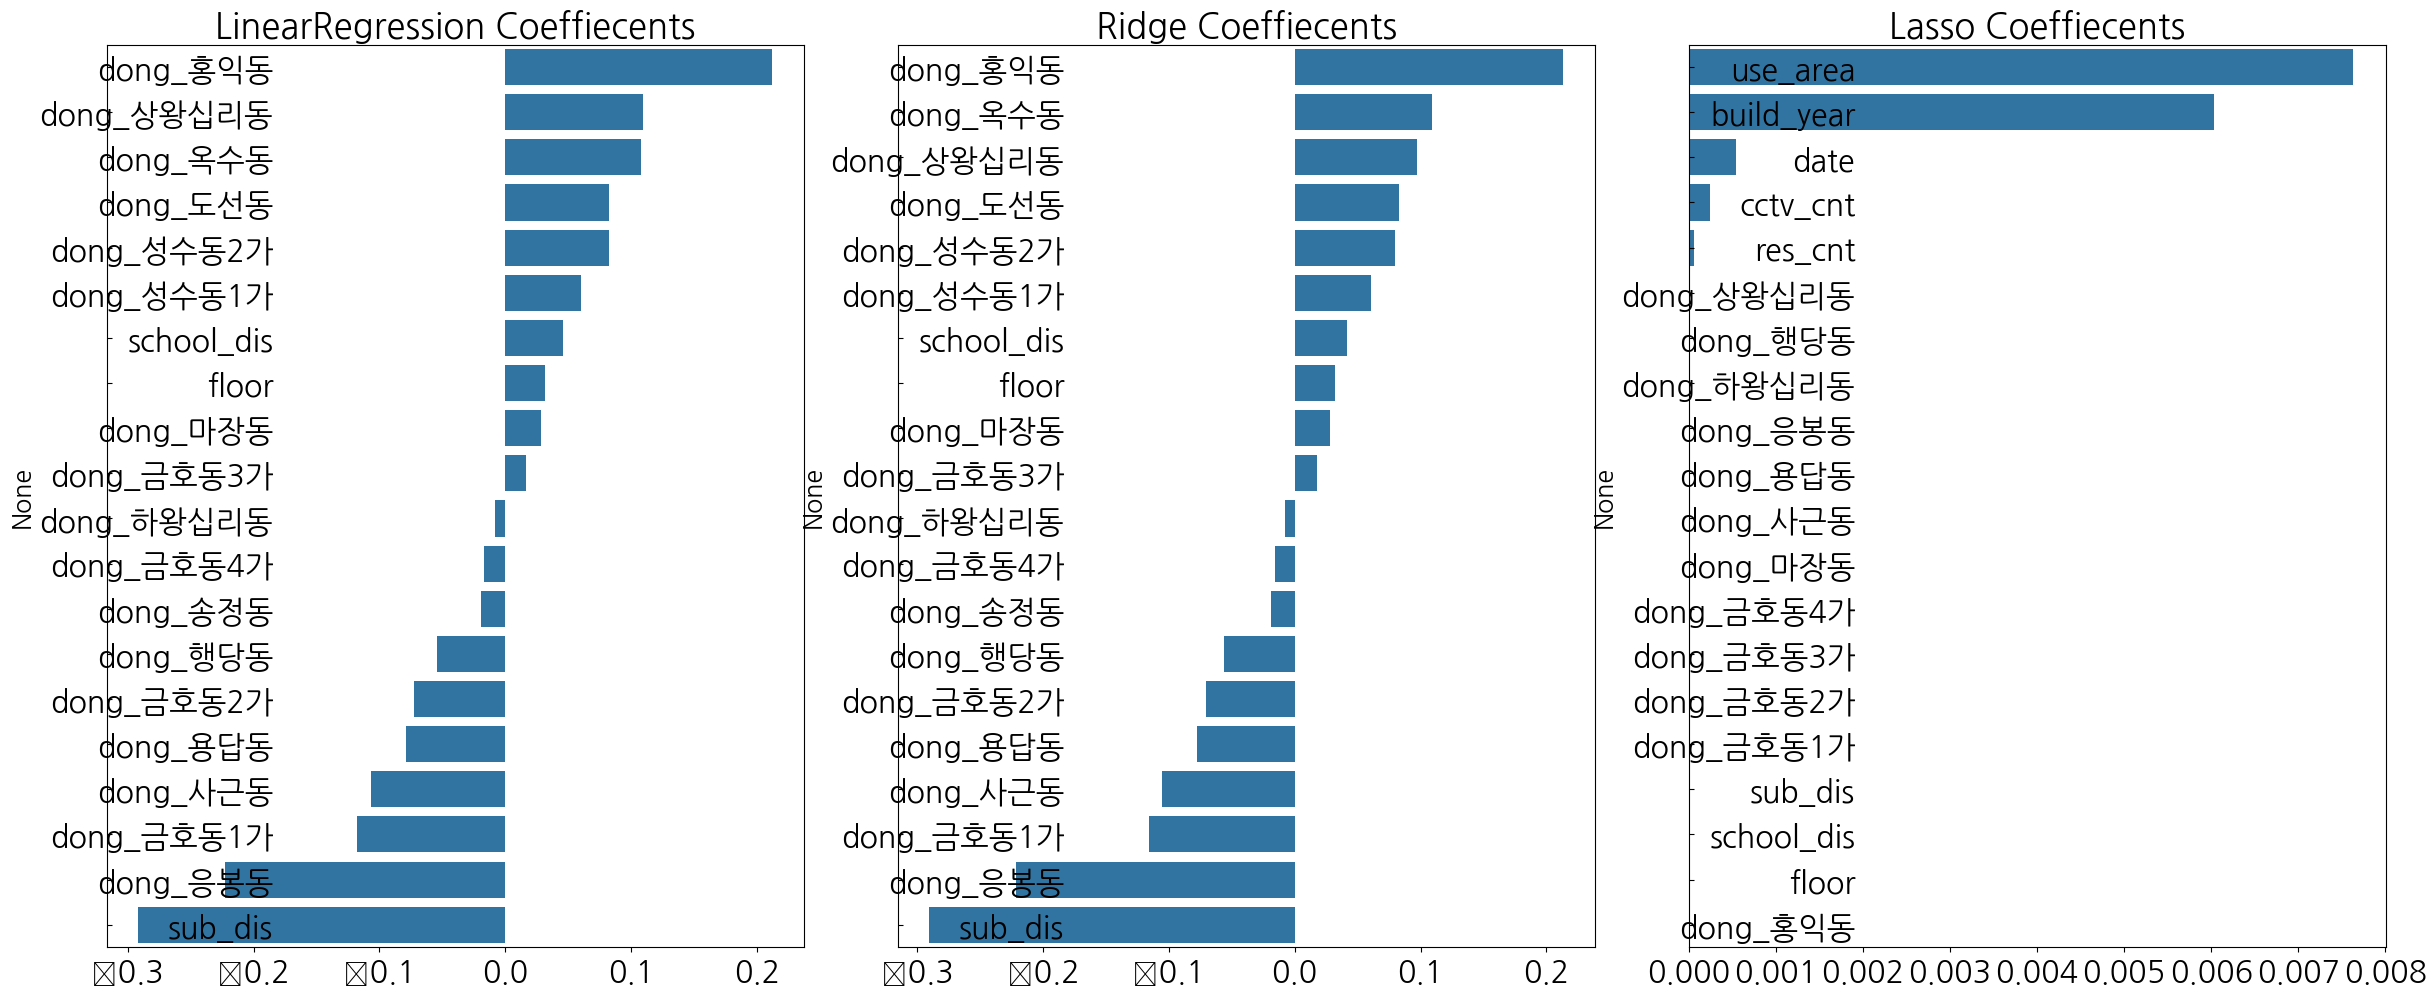

In [357]:
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [358]:
X_train.shape

(9768, 25)

In [359]:
# 교차검증을 통해 한 번 더 확인해보기
# 5폴드 교차검증(훈련/검정 세트를 5깨로 나누어서 5번의 평가를 진행)으로 모델별 rmse와 평균 rmse 값을 구하겠다

In [360]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models) : # 모델 각 각에 대해서 함수를 적용, 평균을 만들겠다. 
    
    # 모델마다 5번 교차검증을 진행, 검증 평가의 평균을 반환한다.
    for model in models :
        
        # 분류, 회귀에도 적용되는 함수
        rmse_list = np.sqrt(-cross_val_score(model, X_train, y_train,
                        # 성능 평가를 위해 negative 붙여줌, 직관적으로 동일한 평가를 하기 위해서이다.
                        # 5 개의 rmse 값이 반환된다. 
                       scoring = 'neg_mean_squared_error', cv = 5))
    
        # 반환된 rmse 값의 평균을 구한다.
        rmse_avg = np.mean(rmse_list)
        # 해당되는 모델의 이름, rmse_list 값을 출력해준다.
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))        

In [361]:
# 앞에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.339 0.328 0.345 0.349 0.368]
LinearRegression CV 평균 RMSE 값: 0.346

Ridge CV RMSE 값 리스트: [0.339 0.328 0.345 0.349 0.368]
Ridge CV 평균 RMSE 값: 0.346

Lasso CV RMSE 값 리스트: [0.389 0.363 0.384 0.392 0.399]
Lasso CV 평균 RMSE 값: 0.385


### 결과
- 5개 폴드 세트로 학습한 후 평가했을 때 라쏘 모델이 다른 회귀 모델에 비해 성능이 떨어짐

**리지/라쏘 모델에 대해 alpha 하이퍼파라미터 튜닝 후 재학습/예측/평가** 
- 최적값을 찾기 위함이다.
- GridSearchCV를 사용하겠다. 하이퍼 파라미터 적용도 자동으로 진행해준다.
- 교차검증 진행 후 저장되는 값들을 따로 설정해준다.
  - gcv.best_score_ : 교차검증 후 가장 성능이 좋은 평가값
  - gcv.best_params_: 가장 좋은 성능의 평가가 나올 때의 하이퍼파라미터 값   - gcv.best_estimator : 최적 파라미터로 재학습된 모델 

In [362]:
from sklearn.model_selection import GridSearchCV
# 모델과 하이퍼 파라미터 딕셔너리 객체를 받아서
# 최적화 작업의 결과를 표시하는 함수
# 릿지 모델과 라쏘 모델의 최적화 alpha 값 추출
def get_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid = params,
                             scoring = 'neg_mean_squared_error', cv = 5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1 * grid_model.best_score_)
 
    print('{0} 5 CV 시 최적 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_ # 최적 파라미터로 재학습되어 저장된 모델 반환

In [363]:
ridge_params = {'alpha' : [0.001, 0.005, 0.05, 0.01, 0.1, 0.5, 1, 5, 10, 15, 20]}
lasso_params = {'alpha' : [0.001, 0.005, 0.05, 0.01, 0.1, 0.5, 1, 5, 10, 15, 20]}

In [364]:
best_ridge = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 RMSE 값: 0.3462, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 RMSE 값: 0.3466, 최적 alpha:{'alpha': 0.001}


# 결과값
- 릿지: 최적 RMSE 값: 0.3462, 최적 alpha:{'alpha': 5}
- 라쏘: 최적 RMSE 값: 0.3466, 최적 alpha:{'alpha': 0.001}

In [365]:
ridge_reg = Ridge(alpha = 0.001)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.001)

In [366]:
# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression RMSE: 0.344
Ridge RMSE: 0.344
Lasso RMSE: 0.383


[0.3436651871023981, 0.34366519001321105, 0.383310443641325]

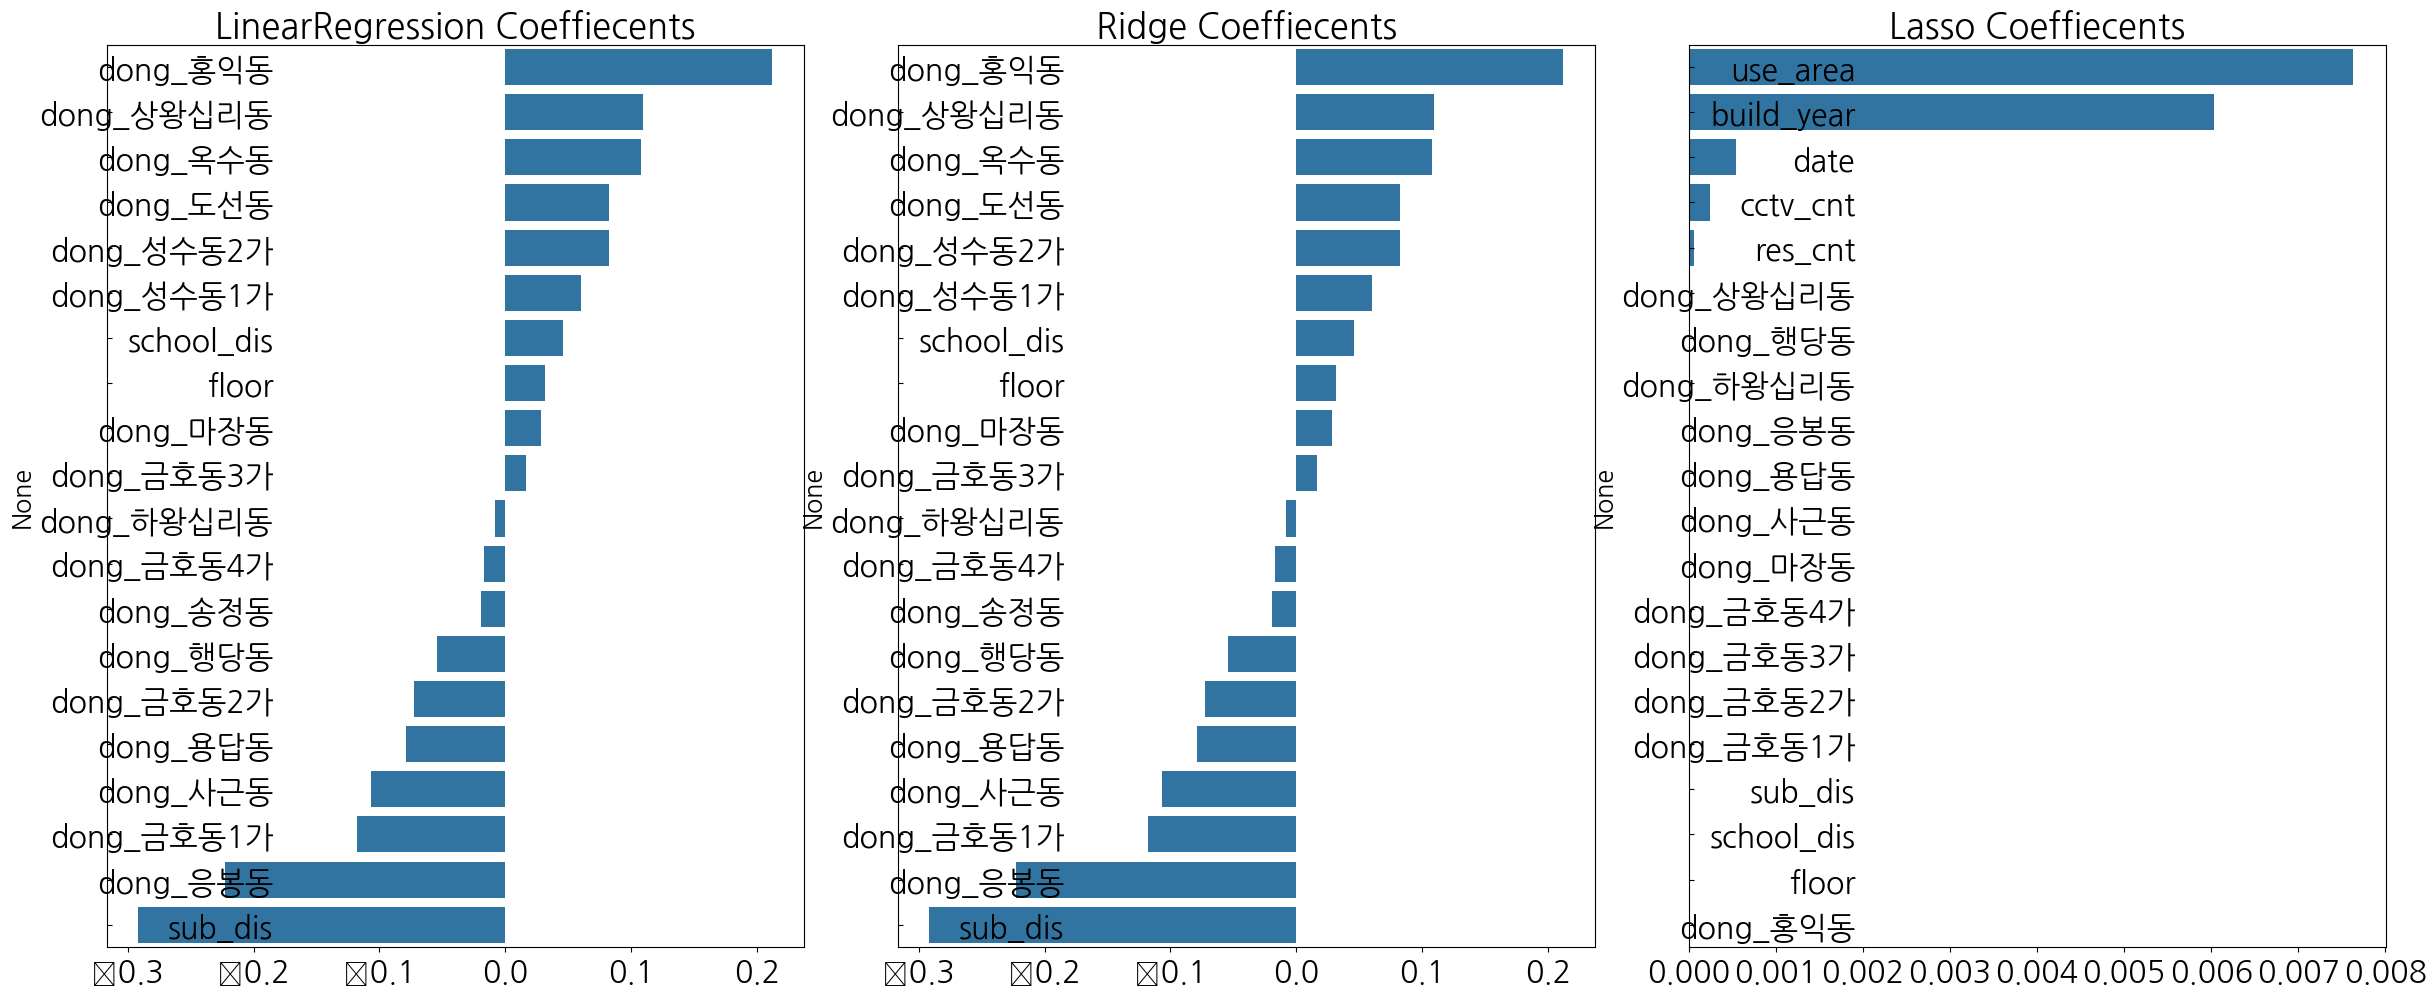

In [367]:
# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

##### 왜곡된 정도 추출 
- 모든 변수를 그래프로 확인 할 수 없으므로 skew()를 함수 사용
    - 주의. 숫자형 피처에서 원-핫 인코딩된 카테고리 숫자형 피처 제외

In [426]:
# 추가 가공하기, 이상치 데이터 처리
# 기존의 데이터를 가져와서 이상치를 확인한다.
seongdong = df_org.copy()

In [427]:
from scipy.stats import skew
# seongdong : 원-인코딩 하기전 df
# 숫자형 피처에서 원-핫 인코딩된 카테고리 숫자형 피처 제외
feautres_index = seongdong.dtypes[seongdong.dtypes != 'object'].index

In [428]:
skew_features = seongdong[feautres_index].apply(lambda x : skew(x))
skew_features

date            -0.187061
build_year      -0.536553
floor            1.019769
use_area         1.279481
res_cnt          0.892885
cctv_cnt        -0.313792
school_dis       1.056420
sub_dis          0.772834
total_deposit    8.942303
dtype: float64

In [429]:
skew_features_top = skew_features[skew_features > 3]
print(skew_features_top.sort_values(ascending=False))

total_deposit    8.942303
dtype: float64


In [430]:
# 왜곡 심한 컬럼에 로그 변환 후 재학습/예측/평가
seongdong[skew_features_top.index] = np.log1p(seongdong[skew_features_top.index])

In [431]:
# 로그 변환 후 다시 왜곡 정도를 확인해보면 왜곡이 어느정도 사라졌다는 것을 알 수 있다.
skew_features = seongdong[feautres_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 0.5]
print(skew_features_top.sort_values(ascending=False))

use_area      1.279481
school_dis    1.056420
floor         1.019769
res_cnt       0.892885
sub_dis       0.772834
dtype: float64


In [432]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 
# 피처/타겟 데이터 세트 다시 생성
# 최적 alpha 값과 RMSE 출력

# 원-핫 인코딩
seongdong_ohe = pd.get_dummies(seongdong)

# 피처/타겟 데이터 세트 다시 생성# 
y_target = seongdong_ohe['total_deposit']
X_features = seongdong_ohe.drop('total_deposit',axis=1, inplace=False)

# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [433]:
# 피처들을 로그 변환 했으므로 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = {'alpha' : [0.001, 0.005, 0.05, 0.01, 0.1, 0.5, 1, 5, 10, 15, 20]} # 변경필요
lasso_params = {'alpha' : [0.001, 0.005, 0.05, 0.01, 0.1, 0.5, 1, 5, 10, 15, 20]}

best_ridge = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 RMSE 값: 0.3462, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 RMSE 값: 0.3466, 최적 alpha:{'alpha': 0.001}


In [434]:
# 왜도가 심한 수치형 데이터에 대해서 로그변환 진행한 data
# 분할된 학습/테스트 데이터를 이용해서
# 모델의 학습/예측/평가 및 모델별 회귀 계수 시각화

# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge(alpha = 5)
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [435]:
# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression RMSE: 0.344
Ridge RMSE: 0.344
Lasso RMSE: 0.344


[0.3436651871023981, 0.34367825926656437, 0.34428203206187863]

### 로그 변환 전
- LinearRegression RMSE: 5889.575
- Ridge RMSE: 5887.556
- Lasso RMSE: 5888.688

### 로그 변환 후
- LinearRegression RMSE: 0.344
- Ridge RMSE: 0.344
- Lasso RMSE: 0.383

### 로그, 알파 변환 후
- LinearRegression RMSE: 0.344
- Ridge RMSE: 0.344
- Lasso RMSE: 0.344

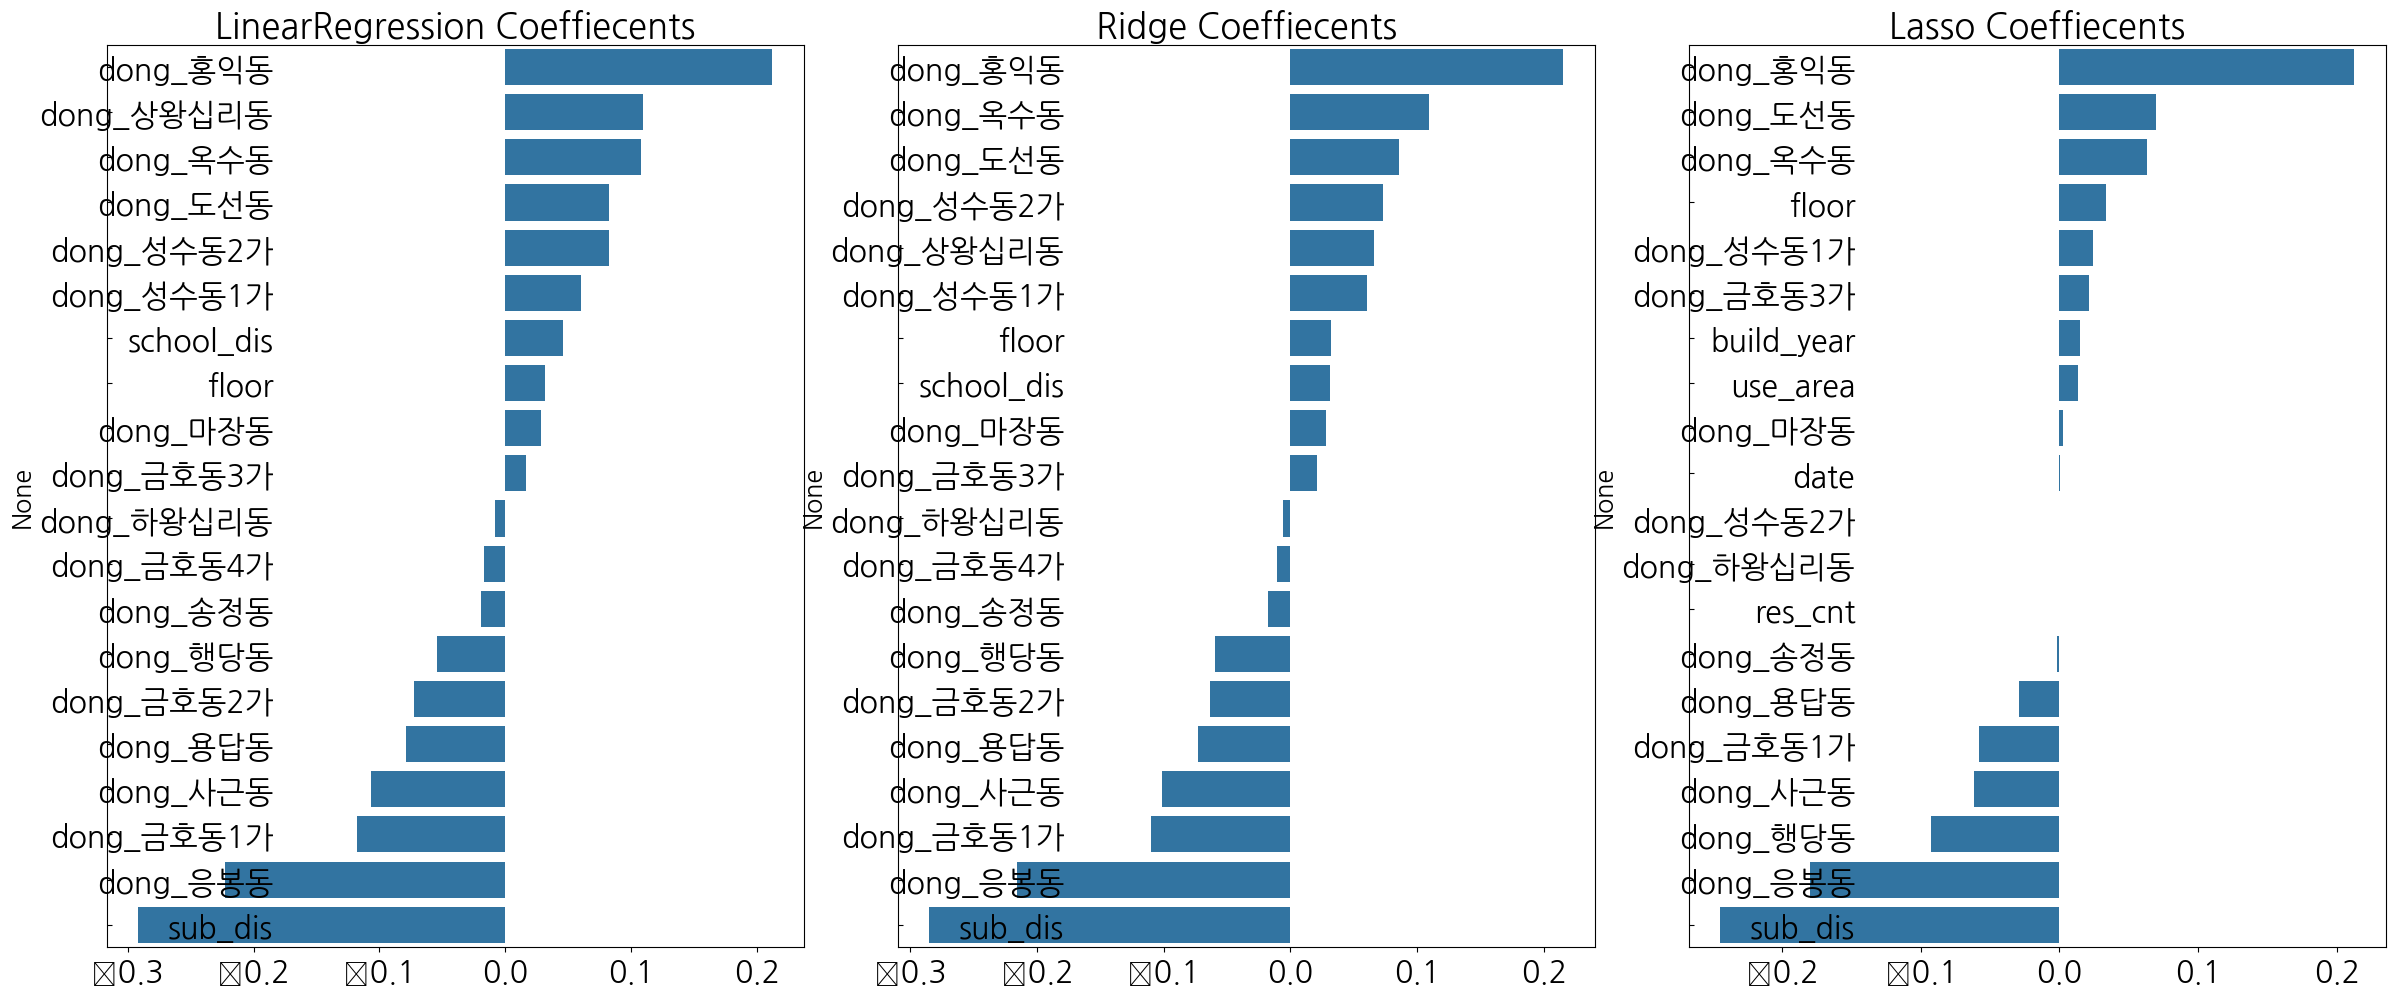

In [437]:
# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

### 결과  
- 세 모델 모두 홍익동이 회귀 계수가 가장 높은 피처가 되었다.
- 연립 다세대주택 전세 가격을 결정하는데 동(층도 어느정도 영향이 있다)이 가장 큰 영향을 끼친다. -> 모델 내용은 상식적이다. -> 데이터 가공이 필요

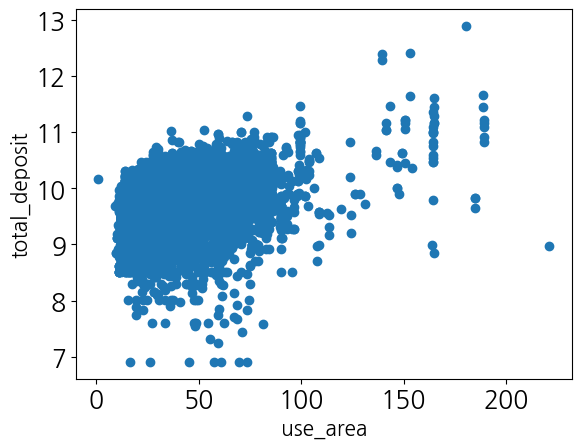

In [463]:
# 층과 집가격과의 관계
# 이렇게 진행했을 때 가장 선형이 잘 나타나는 feature는 use area 이다.
plt.scatter(x = seongdong['use_area'], y = seongdong['total_deposit'])
plt.ylabel('total_deposit', fontsize=15)
plt.xlabel('use_area', fontsize=15)
plt.show()

In [ ]:
# 이상치 찾고 데이터들의 scaling 표점으로 바꿔서 진행